In [19]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Enumu0
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_0m/Enumu_0m_rebin.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Enue0
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_0m/Enue_0m_rebin.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Enumubar0
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_0m/Enumubar_0m_rebin.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Enuebar0
Info in <TCanvas::Print>: png file Flux_NDGAr_PRISM_0m/Enuebar_0m_rebin.png has been created
Warning in <TFile::Append>: Replacing existing TH1: histonumuoff (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histonumubaroff (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histonueoff (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histonue

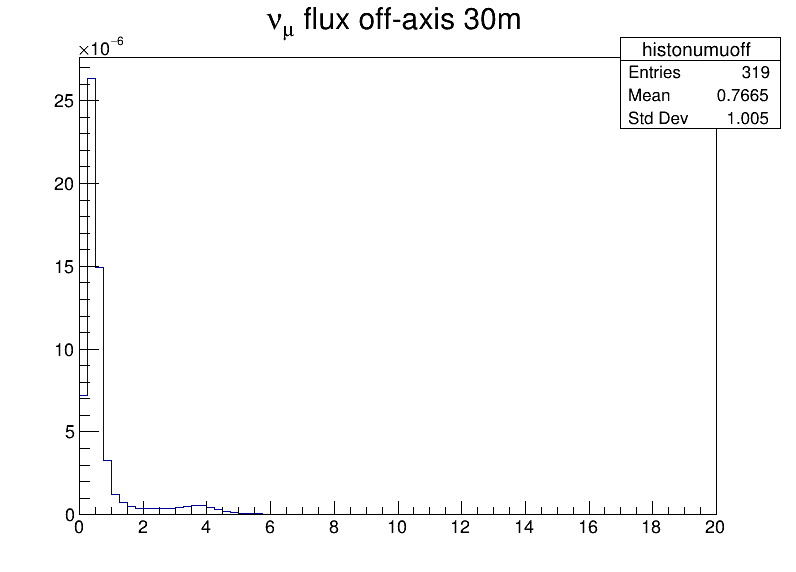

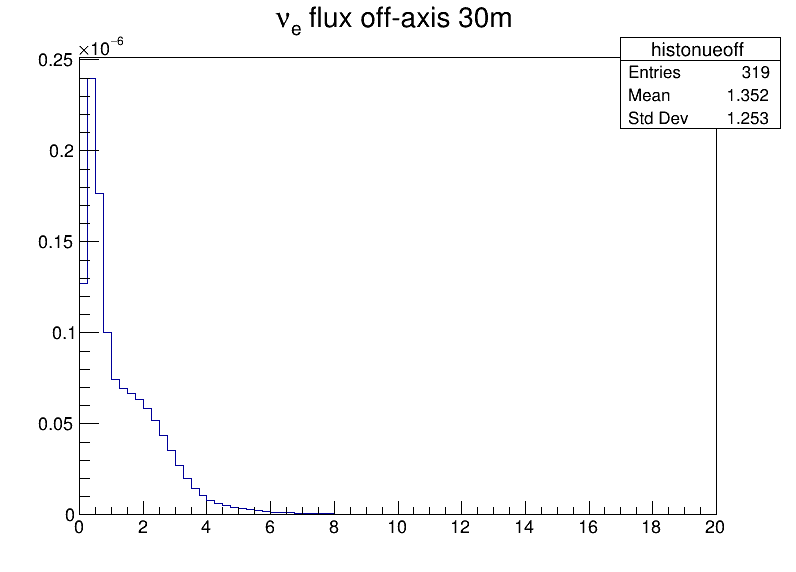

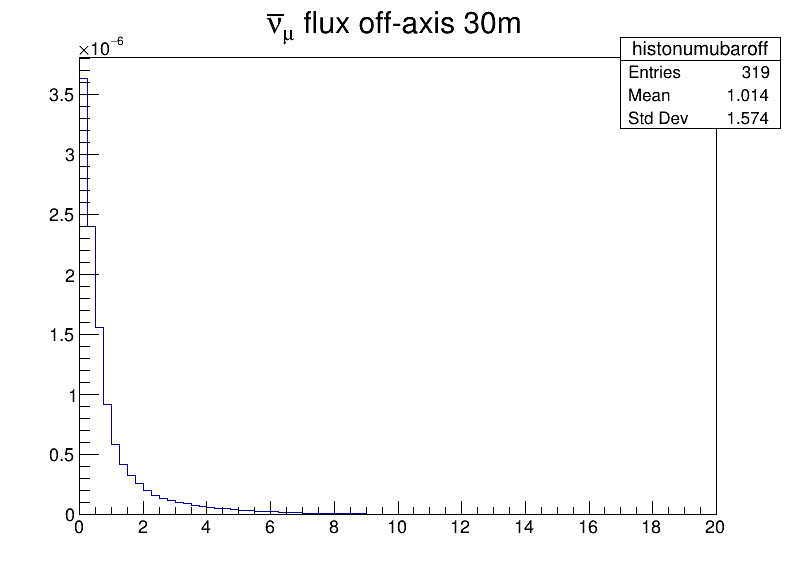

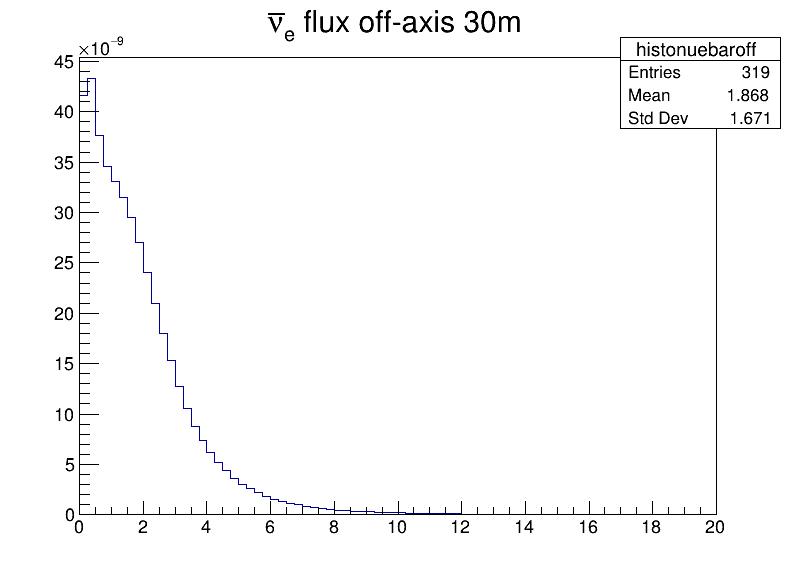

In [20]:
filename="/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/PRISM-TKI/histos_g4lbne_v3r5p9_QGSP_BERT_OfficialEngDesignSept2021_neutrino_GAr_center.root"
file = ROOT.TFile(filename)

Folder_Flux = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/PRISM-TKI/"
#Flux = "Flux_NDGAr_PRISM_"
Flux="DUNE_ND_antineutrinomode_Flux_2017_std"

centers =  []
nbins=0

with open(Folder_Flux+Flux+".dat") as fp:
    for line in fp:
        wholeline = []
        wholeline.extend(float(item) for item in line.split())
        centers.append(wholeline[0])
        nbins+=1






histonumu = file.Get("Unosc_numu_flux_DUNEPRISM_GAr_center") 
histonue = file.Get("Unosc_nue_flux_DUNEPRISM_GAr_center") 
histonumubar = file.Get("Unosc_numubar_flux_DUNEPRISM_GAr_center") 
histonuebar = file.Get("Unosc_nuebar_flux_DUNEPRISM_GAr_center") 



for i in range(7):

    offaxis= (i)*5 #distance offaxis in meters
    nbin = offaxis*20+81  #correspondent bin to off-axis position

    Folder = "Flux_NDGAr_PRISM_"+str(offaxis)+"m/"
    Filename = Folder+"Flux_NDGAr_PRISM_"+str(offaxis)+"m_rebin.dat"
    text_file = open(Filename, "w")
    Filename_numu = Folder+"Flux_NDGAr_numu_PRISM_"+str(offaxis)+"m_rebin.dat"
    text_file_numu = open(Filename_numu, "w")
    Filename_nue = Folder+"Flux_NDGAr_nue_PRISM_"+str(offaxis)+"m_rebin.dat"
    text_file_nue = open(Filename_nue, "w")
    Filename_numubar = Folder+"Flux_NDGAr_numubar_PRISM_"+str(offaxis)+"m_rebin.dat"
    text_file_numubar = open(Filename_numubar, "w")
    Filename_nuebar = Folder+"Flux_NDGAr_nuebar_PRISM_"+str(offaxis)+"m_rebin.dat"
    text_file_nuebar = open(Filename_nuebar, "w")
    

        
    histonumuoffst = histonumu.ProjectionX("",nbin,nbin,"").Clone() 
    histonueoffst = histonue.ProjectionX("",nbin,nbin,"").Clone()
    histonumubaroffst = histonumubar.ProjectionX("",nbin,nbin,"").Clone()
    histonuebaroffst = histonuebar.ProjectionX("",nbin,nbin,"").Clone()

    
    binwidth = 0
    onebincontmu = 0
    bincontmu = []
    onebincontmubar = 0
    bincontmubar = []
    onebinconte = 0
    binconte = []
    onebincontebar= 0
    bincontebar = []
    edge = 0
    edges = [0]

    for e in range(len(centers)):
        edge+=0.25
        edges.append(edge)

    histonumuoff=ROOT.TH1D("histonumuoff","histonumuoff",len(centers),array('d',edges))
    histonumubaroff=ROOT.TH1D("histonumubaroff","histonumubaroff",len(centers),array('d',edges))
    histonueoff=ROOT.TH1D("histonueoff","histonueoff",len(centers),array('d',edges))
    histonuebaroff=ROOT.TH1D("histonuebaroff","histonuebaroff",len(centers),array('d',edges))
    #print(histonueoff.GetNbinsX())
    i=1
    for b in range (1,histonumuoffst.GetNbinsX()+1):
        binwidth+=histonumuoffst.GetBinWidth(b)
        #print(binwidth)
        onebincontmu+=histonumuoffst.GetBinContent(b)
        onebincontmubar+=histonumubaroffst.GetBinContent(b)
        onebinconte+=histonueoffst.GetBinContent(b)
        onebincontebar+=histonuebaroffst.GetBinContent(b)
        if (abs((binwidth-0.25))<0.000001):
            bincontmu.append(onebincontmu)
            bincontmubar.append(onebincontmubar)
            binconte.append(onebinconte)
            bincontebar.append(onebincontebar)

            histonumuoff.SetBinContent(i,onebincontmu)
            histonumubaroff.SetBinContent(i,onebincontmubar)
            histonueoff.SetBinContent(i,onebinconte)
            histonuebaroff.SetBinContent(i,onebincontebar)
            i+=1

            binwidth=0
            onebincontmu=0
            onebincontmubar=0
            onebinconte=0
            onebincontebar=0
            
        if(len(bincontmu)==len(centers)): break



    for iev in range(1,histonumuoff.GetNbinsX()+1):
        width = histonumuoff.GetBinWidth(iev)   

        totnumu=histonumuoff.GetBinContent(iev)
        totnue=histonueoff.GetBinContent(iev)
        totnumubar=histonumubaroff.GetBinContent(iev)
        totnuebar=histonuebaroff.GetBinContent(iev)
        text_file.write(str(centers[iev-1])+" "+str(totnue)+" "+str(totnumu)+" "+str(0.0)+" "+str(totnuebar)+" "+str(totnumubar)+" "+str(0.0)+"\n")
        text_file_numu.write(str(centers[iev-1])+" "+str(totnumu)+"\n")
        text_file_nue.write(str(centers[iev-1])+" "+str(totnue)+"\n")
        text_file_numubar.write(str(centers[iev-1])+" "+str(totnumubar)+"\n")
        text_file_nuebar.write(str(centers[iev-1])+" "+str(totnuebar)+"\n")



    histonumuoff.GetXaxis().SetRangeUser(0,20)
    histonumubaroff.GetXaxis().SetRangeUser(0,20)
    histonueoff.GetXaxis().SetRangeUser(0,20)
    histonuebaroff.GetXaxis().SetRangeUser(0,20)

    Canvasnumu = "Enumu"+str(offaxis)
    cEnumu = ROOT.TCanvas(Canvasnumu,Canvasnumu,800,600)
    Title = "#nu_{#mu} flux off-axis "+str(offaxis)+"m"
    histonumuoff.SetTitle(Title)
    histonumuoff.Draw()
    cEnumu.Draw()
    save=Folder+"Enumu_"+str(offaxis)+"m_rebin.png"
    cEnumu.Print(save)

    Canvasnue = "Enue"+str(offaxis)
    cEnue = ROOT.TCanvas(Canvasnue,Canvasnue,800,600)
    Title = "#nu_{e} flux off-axis "+str(offaxis)+"m"
    histonueoff.SetTitle(Title)
    histonueoff.Draw()
    cEnue.Draw()
    save=Folder+"Enue_"+str(offaxis)+"m_rebin.png"
    cEnue.Print(save)

    Canvasnumubar = "Enumubar"+str(offaxis)
    cEnumubar = ROOT.TCanvas(Canvasnumubar,Canvasnumubar,800,600)
    Title = "#bar{#nu}_{#mu} flux off-axis "+str(offaxis)+"m"
    histonumubaroff.SetTitle(Title)
    histonumubaroff.Draw()
    cEnumubar.Draw()
    save=Folder+"Enumubar_"+str(offaxis)+"m_rebin.png"
    cEnumubar.Print(save)

    Canvasnuebar = "Enuebar"+str(offaxis)
    cEnuebar = ROOT.TCanvas(Canvasnuebar,Canvasnuebar,800,600)
    Title = "#bar{#nu}_{e} flux off-axis "+str(offaxis)+"m"
    histonuebaroff.SetTitle(Title)
    histonuebaroff.Draw()
    cEnuebar.Draw()
    save=Folder+"Enuebar_"+str(offaxis)+"m_rebin.png"
    cEnuebar.Print(save)


    